In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
tf.__version__

'2.6.0'

### **Loading the dataset**

In [2]:
from tensorflow import keras
boston_housing = keras.datasets.boston_housing
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 1us/step


In [3]:
x_train.dtype

dtype('float64')

In [4]:
x_train.shape,y_train.shape,x_train[0].shape

((404, 13), (404,), (13,))

In [5]:
x_test.shape,y_test.shape

((102, 13), (102,))

In [6]:
tensor1 = tf.constant(x_train)
tensor2 = tf.constant(y_train)

### **MODEL1: TRAINING WITH SELU AND WITHOUT STANDARDIZATION**

In [7]:
#creating the model
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
 tf.keras.layers.Dense(100,activation='selu',kernel_initializer="lecun_normal"),
 tf.keras.layers.Dense(100,activation='selu',kernel_initializer="lecun_normal"),
 tf.keras.layers.Dense(100,activation='selu',kernel_initializer="lecun_normal"),
 tf.keras.layers.Dense(100,activation='selu',kernel_initializer="lecun_normal"),
 tf.keras.layers.Dense(100,activation='selu',kernel_initializer="lecun_normal"),
 tf.keras.layers.Dense(1,name = 'OUTPUT')
])

In [8]:
model1.compile(loss = "mse",optimizer=tf.keras.optimizers.Adam(),metrics = "mae")

In [9]:
start = time.time()
history1 = model1.fit(tensor1,tensor2,epochs = 100)
end = time.time()
time1 = end-start

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 342.7452 - mae: 14.1687
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 88.7206 - mae: 6.9113
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 65.6447 - mae: 5.9004
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 78.7225 - mae: 6.3398
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 75.8708 - mae: 6.3446
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 62.7347 - mae: 5.5929
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 59.6950 - mae: 5.3561
Epoch 8/100
13/13 [==============================] - 0s 997us/step - loss: 61.7269 - mae: 5.6395
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 70.1086 - mae: 5.8949
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 59.8240 - mae: 5.6855
Epoch 11/100
13/13 [=========================

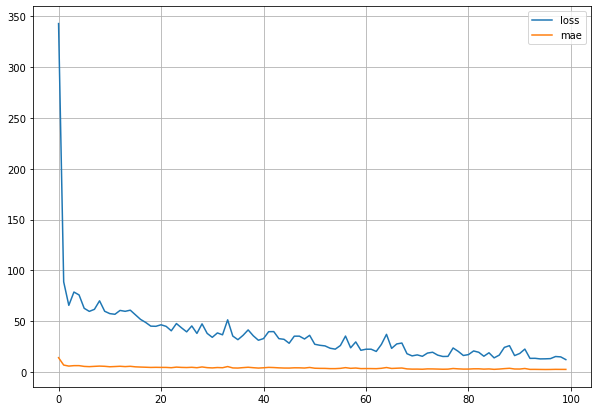

In [10]:
pd.DataFrame(history1.history).plot(figsize = (10,7))#history.history is a dictionary
plt.grid(True)
plt.legend()
plt.show()

In [11]:
eval1 = model1.evaluate(x_test,y_test)

4/4 [==============================] - 0s 997us/step - loss: 27.2175 - mae: 3.5784


### **MODEL2:TRAINING WITH RELU WITHOUT STANDARDIZATION**

In [12]:
#building the model
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
 tf.keras.layers.Dense(100,activation="relu"),
 tf.keras.layers.Dense(100,activation="relu"),
 tf.keras.layers.Dense(100,activation="relu"),
 tf.keras.layers.Dense(100,activation="relu"),
 tf.keras.layers.Dense(100,activation="relu"),
 tf.keras.layers.Dense(1)
])
#compiling the model
model2.compile(loss = "mse",optimizer = tf.keras.optimizers.Adam(),metrics = 'mae')
#fitting the model
start = time.time()
history2 = model2.fit(x_train,y_train,verbose=1,epochs = 100)
end = time.time()
time2 = end-start

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 193.4279 - mae: 10.5107
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 77.6498 - mae: 6.3544
Epoch 3/100
13/13 [==============================] - 0s 997us/step - loss: 67.0691 - mae: 5.9549
Epoch 4/100
13/13 [==============================] - 0s 913us/step - loss: 62.3810 - mae: 5.4402
Epoch 5/100
13/13 [==============================] - 0s 997us/step - loss: 61.3177 - mae: 5.5297
Epoch 6/100
13/13 [==============================] - 0s 997us/step - loss: 60.9490 - mae: 5.5005
Epoch 7/100
13/13 [==============================] - 0s 997us/step - loss: 62.0228 - mae: 5.5291
Epoch 8/100
13/13 [==============================] - 0s 997us/step - loss: 64.0066 - mae: 5.5201
Epoch 9/100
13/13 [==============================] - 0s 997us/step - loss: 59.7497 - mae: 5.3624
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 58.5031 - mae: 5.2784
Epoch 11/100
13/13 [=============

In [13]:
y_pred = model2.predict(x_test)
y_pred.shape

(102, 1)

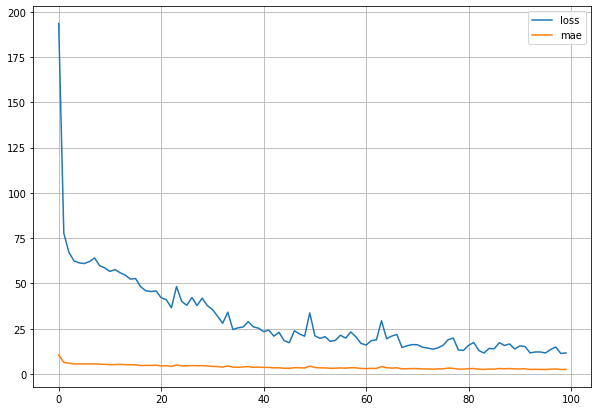

In [14]:
df = pd.DataFrame(history2.history)
df.plot(figsize=(10,7))
plt.grid((True))
plt.legend()
plt.show()

In [15]:
eval2 = model2.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 29.8766 - mae: 3.6188


### **MODEL3:TRAINING WITH RELU AND STANDARDIZATION**

In [16]:
dataset = pd.DataFrame(x_train)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
ct = make_column_transformer((StandardScaler(),dataset.columns.values.tolist()))
ct.fit(x_train)
standardized_train = ct.transform(x_train)
standardized_train,standardized_train.dtype

(array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
          0.44807713,  0.8252202 ],
        [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
          0.43190599, -1.32920239],
        [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
          0.22061726, -1.30850006],
        ...,
        [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
          0.07943894, -0.67776904],
        [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
         -0.98764362,  0.42083466],
        [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
          0.23317118, -1.15392266]]),
 dtype('float64'))

In [17]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1)
])
model3.compile(loss = 'mse',optimizer=tf.keras.optimizers.Adam(),metrics = 'mae')
start = time.time()
history3 = model3.fit(standardized_train,y_train,epochs = 100)
end = time.time()
time3 = end-start

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 544.2007 - mae: 21.4570
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 250.8026 - mae: 13.1880
Epoch 3/100
13/13 [==============================] - 0s 997us/step - loss: 81.7017 - mae: 6.4798
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 36.5521 - mae: 4.1697
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 23.9999 - mae: 3.3875
Epoch 6/100
13/13 [==============================] - 0s 997us/step - loss: 20.3032 - mae: 3.1951
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 17.1329 - mae: 2.9170
Epoch 8/100
13/13 [==============================] - 0s 997us/step - loss: 15.8168 - mae: 2.9127
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 13.8823 - mae: 2.6693
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 13.0308 - mae: 2.5604
Epoch 11/100
13/13 [===================

In [18]:
dataset = pd.DataFrame(x_test)
ct = make_column_transformer((StandardScaler(),dataset.columns.values.tolist()))
ct.fit(dataset)
standardized_test = ct.transform(dataset)
standardized_test

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [19]:
eval3 = model3.evaluate(standardized_test,y_test)

4/4 [==============================] - 0s 997us/step - loss: 14.3449 - mae: 2.6640


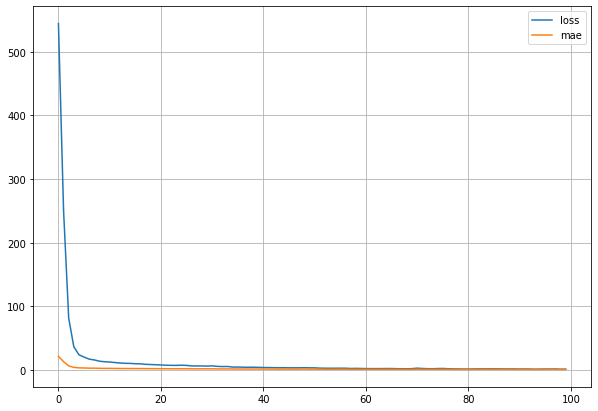

In [20]:
pd.DataFrame(history3.history).plot(figsize=(10,7))
plt.grid(True)
plt.legend()
plt.show()

### **MODEL4: TRAINING WITH SELU AND STANDARDIZATION**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
df = pd.DataFrame(x_train)
ct = make_column_transformer((StandardScaler(),df.columns.values.tolist()))
ct.fit(df)
standardized_train = ct.transform(df)
standardized_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [22]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
  tf.keras.layers.Dense(1)
])
model4.compile(loss = 'mse',optimizer = tf.keras.optimizers.Adam(),metrics = 'mae')
start = time.time()
history4 = model4.fit(standardized_train,y_train,epochs = 100)
end = time.time()
time4 = end-start

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 399.9892 - mae: 18.0160
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 79.6047 - mae: 6.6363
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 44.8545 - mae: 4.9192
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 32.5368 - mae: 3.7569
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 23.9652 - mae: 3.2382
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 19.7377 - mae: 2.9514
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 16.3111 - mae: 2.6389
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 13.9222 - mae: 2.5653
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 12.0538 - mae: 2.3659
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 10.5003 - mae: 2.1968
Epoch 11/100
13/13 [===========================

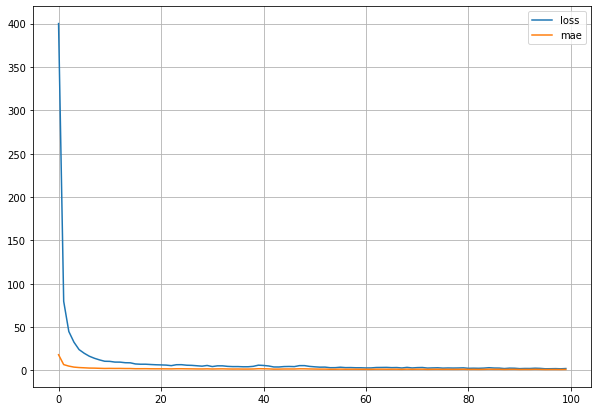

In [23]:
pd.DataFrame(history4.history).plot(figsize=(10,7))
plt.grid(True)
plt.legend()
plt.show()

In [24]:
df = pd.DataFrame(x_test)
ct.fit(df)
standardized_test = ct.transform(df)
eval4 = model4.evaluate(standardized_test,y_test)

4/4 [==============================] - 0s 665us/step - loss: 10.1025 - mae: 2.2932


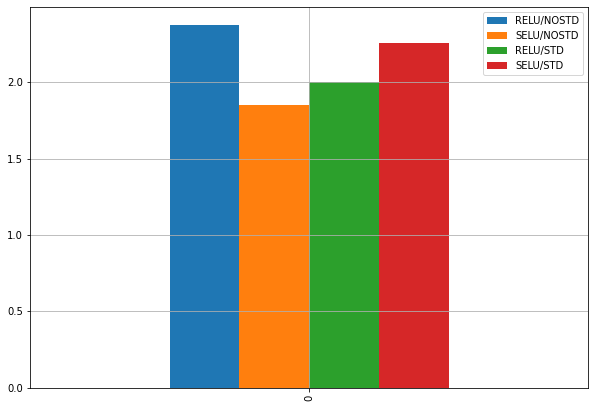

In [35]:
time_required = {
  "RELU/NOSTD": [time1],
  "SELU/NOSTD": [time2],
  "RELU/STD": [time3],
    "SELU/STD": [time4]
}
pd.DataFrame.from_dict(time_required).plot(kind = 'bar',figsize=(10,7))
plt.grid(True)
plt.legend()
plt.show()

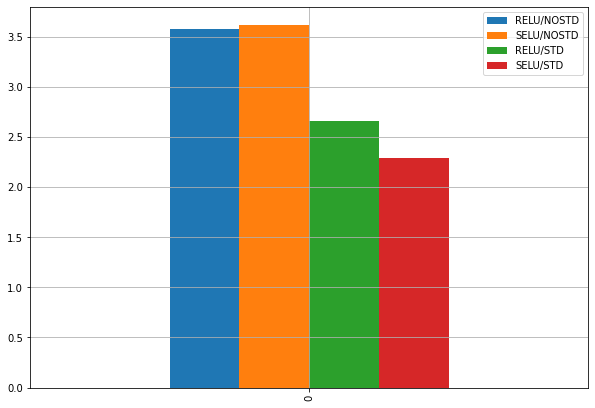

In [41]:
time_required = {
  "RELU/NOSTD": [eval1[1]],
  "SELU/NOSTD": [eval2[1]],
  "RELU/STD": [eval3[1]],
    "SELU/STD": [eval4[1]]
}
pd.DataFrame.from_dict(time_required).plot(kind = 'bar',figsize=(10,7))
plt.grid(True)
plt.legend()
plt.show()